In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\chuan\Desktop\Ironhack\Week 5\Day 1\amz_uk_price_prediction_dataset.csv")

display(df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Display all columns 
df.columns
df.value_counts('category')

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Plugs                                        107
Alexa Built-In Devices                       107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [4]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# 1. Crosstab Analysis:
# 1.1 Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

# 1.2 Are there categories where being a best-seller is more prevalent?
proportion_best_sellers = crosstab_result[True].sort_values(ascending=False)
display(proportion_best_sellers)
# Answer: Grocery 

category
Grocery                        556
Health & Personal Care         552
Baby                           341
Sports & Outdoors              330
Power & Hand Tools             306
                              ... 
Downhill Ski Boots               0
Digital Frames                   0
Motorbike Chassis                0
Motorbike Drive & Gears          0
eBook Readers & Accessories      0
Name: True, Length: 296, dtype: int64

In [5]:
# 2. Statistical Tests:
# 2.1 Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [6]:
# 2.2 Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

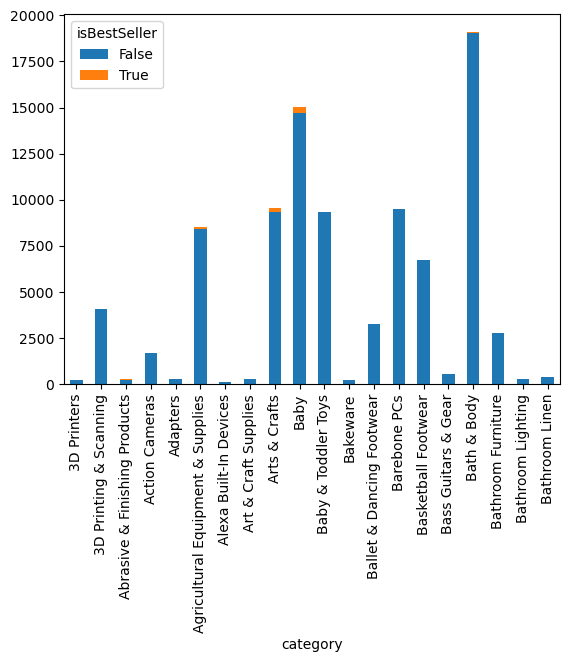

In [7]:
# 3. Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
bestseller20_crosstab_result = crosstab_result.head(20)
# Create stacked bar chart
bestseller20_crosstab_result.plot(kind="bar", stacked=True);

In [17]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# 0 Preliminary Step: Remove outliers in product prices.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

no_out_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
display(no_out_df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


C:\Users\chuan\AppData\Local\Temp\ipykernel_16256\1761412328.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='price', y='category', palette="coolwarm", legend=True);


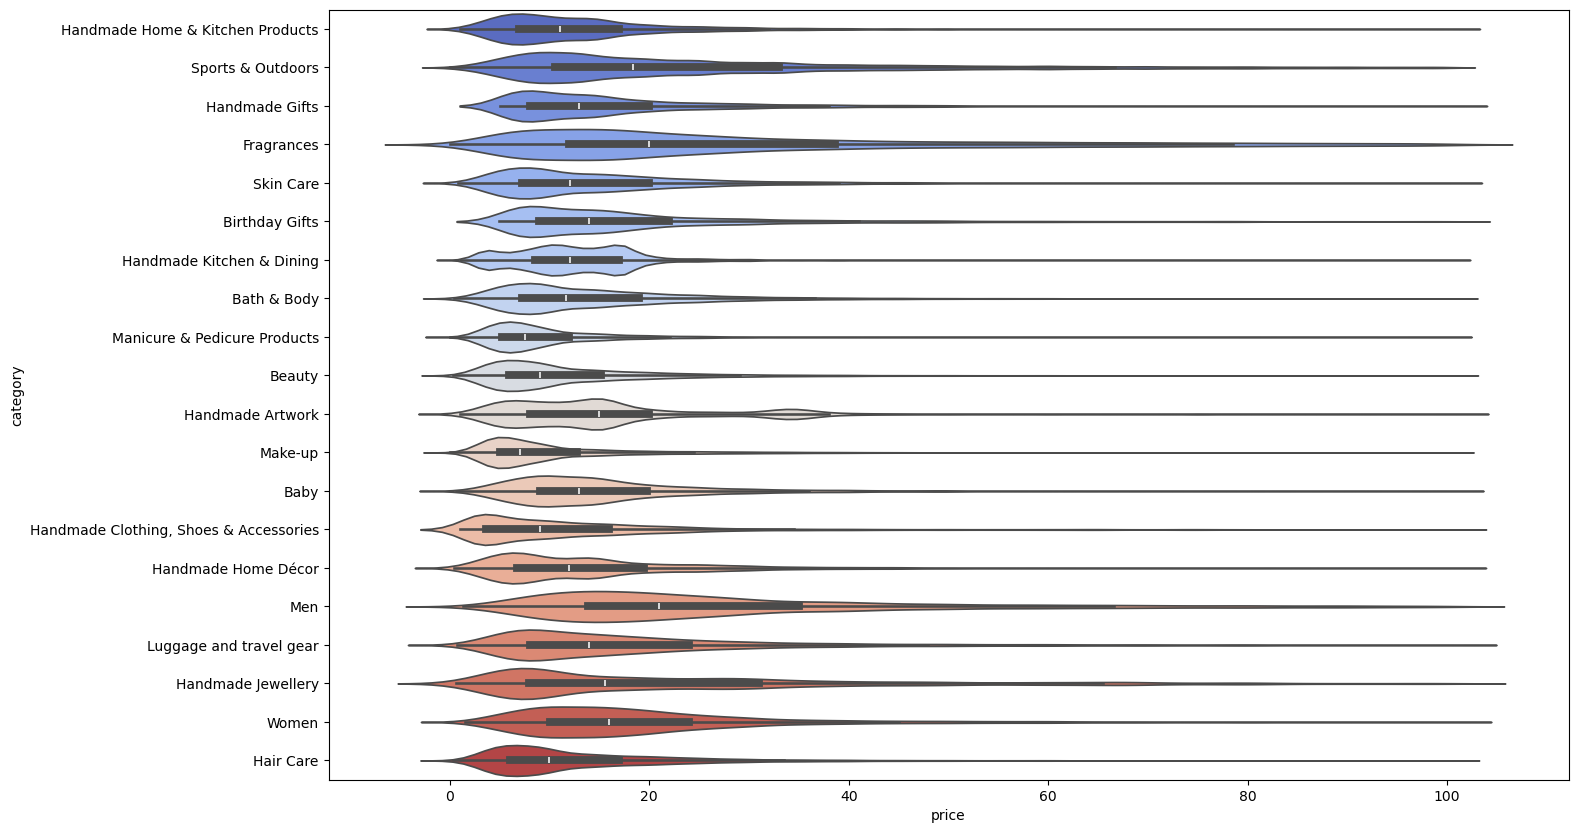

In [25]:
# 1 Violin Plots:
# 1.1 Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
top_20_categories = no_out_df['category'].value_counts().head(20).index.tolist()
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create violin plot
plt.figure(figsize=(16, 10))
sns.violinplot(data=df_top_20, x='price', y='category', palette="coolwarm", legend=True);

In [36]:
# 1.2 Which product category tends to have the highest median price? Don't filter here by top categories.
median_prices = no_out_df.groupby('category')['price'].median().sort_values(ascending=False)
median_prices 

# Answer: Desktop PCs has the highest median price 

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

<Axes: xlabel='category'>

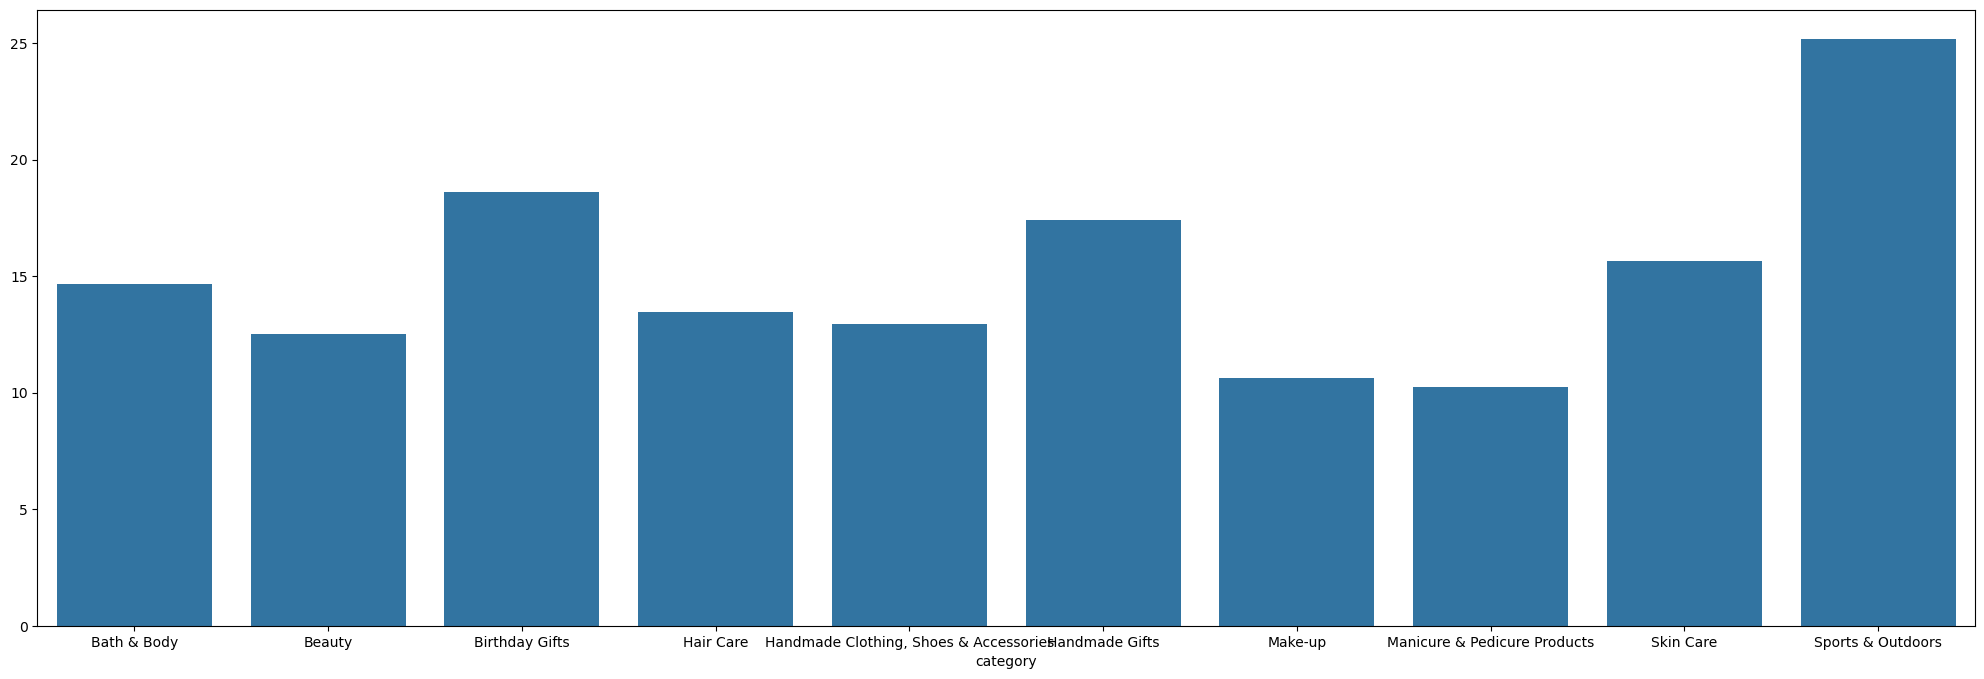

In [48]:
# 2 Bar Charts:
# 2.1 Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top_10_categories = no_out_df['category'].value_counts().head(10).index.tolist()
# average price of each top 10
average_prices_top_10 = no_out_df[no_out_df['category'].isin(top_10_categories)].groupby('category')['price'].mean()

plt.figure(figsize=(25, 8))
sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values)

# 2.2 Which product category commands the highest average price? Don't filter here by top categories.
# Answer: Sports&Outdoors 

C:\Users\chuan\AppData\Local\Temp\ipykernel_16256\1437152331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='stars', y='category', palette="coolwarm");


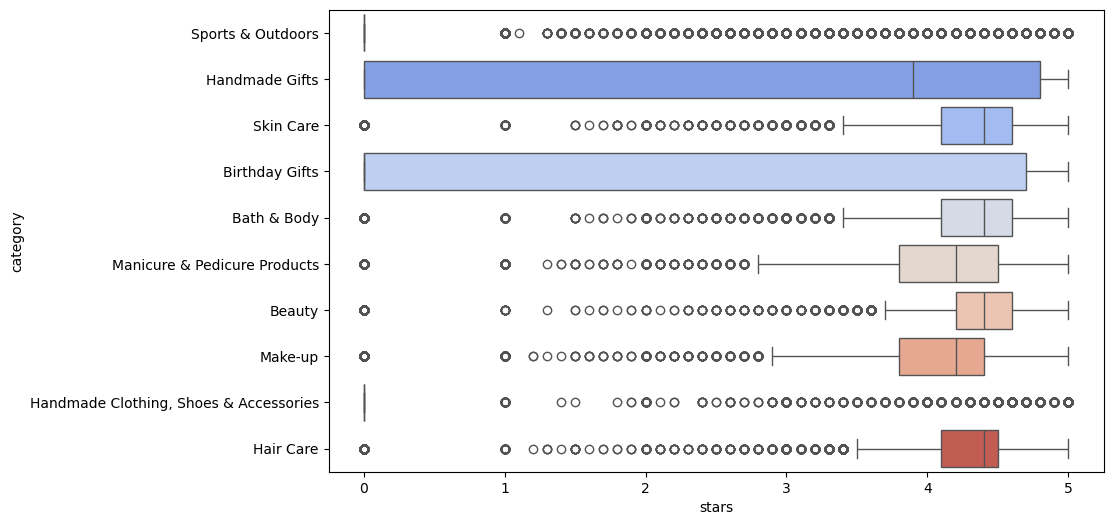

In [72]:
# 3 Box Plots:
# 3.1 Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
top_10_categories = no_out_df['category'].value_counts().head(10).index.tolist()
df_top_10 = no_out_df[no_out_df['category'].isin(top_10_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_10, x='stars', y='category', palette="coolwarm");

# 3.2 Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
# Answer: Sports&Outdoors

In [96]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# 1 Correlation Coefficients:
# 1.1 Calculate the correlation coefficient between price and stars.
correlation = no_out_df['price'].corr(df['stars'])
correlation

# 1.2 Is there a significant correlation between product price and its rating?
# Answer: No significant correlation, a value close to 0 implies little to linear/monotonic correlation.

-0.0776729987818137

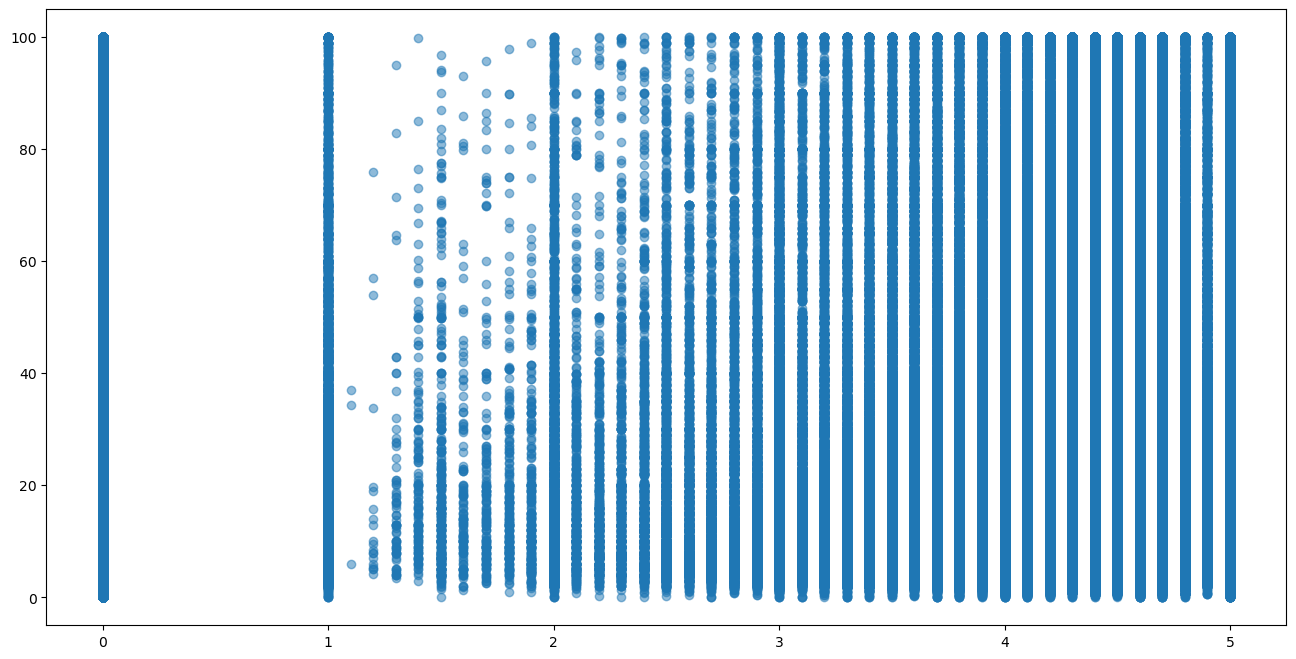

In [104]:
# 2 Visualizations:
# 2.1 Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.scatter(no_out_df['stars'], no_out_df['price'], alpha=0.5)

In [107]:
# 2.2 Use a correlation heatmap to visualize correlations between all numerical variables.
 # Correlation heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'B09B96TG33'

<Figure size 1000x800 with 0 Axes>

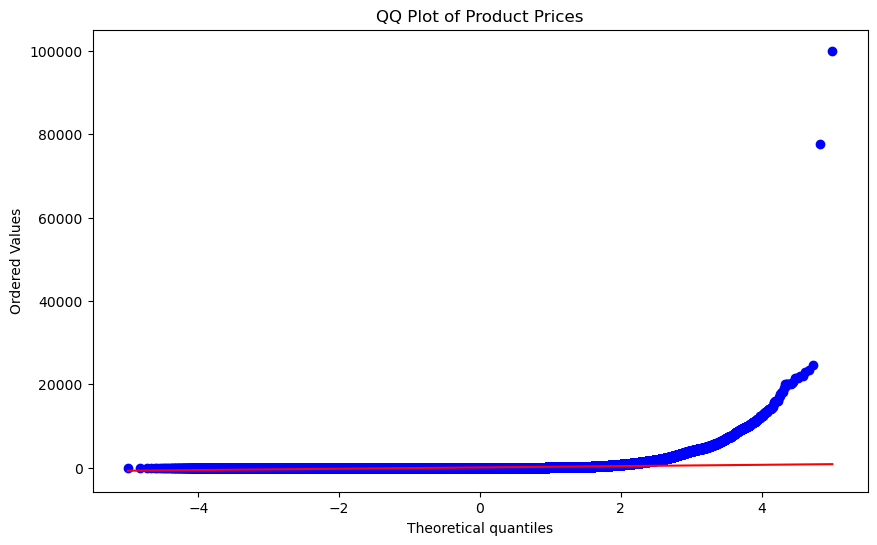

In [106]:
# 2.3 Examine if product prices typically follow a normal distribution using a QQ plot.
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.show()